<a href="https://colab.research.google.com/github/olcaykursun/ML/blob/main/MLP_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Combining our lecture notes and with inspiration from Nvidia's self-paced online course Building A Brain in 10 Minutes:
https://courses.nvidia.com/courses/course-v1:DLI+T-FX-01+V1/


In [14]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = tf.keras.datasets.fashion_mnist
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


# Read the train and test sets
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Splitting the train set into new train and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, train_size=0.8, random_state=42
)

print("Training set:", train_images.shape, train_labels.shape)
print("Validation set:", val_images.shape, val_labels.shape)
print("Test set:", test_images.shape, test_labels.shape)

number_of_classes = len(class_names)
print(number_of_classes)


Training set: (48000, 28, 28) (48000,)
Validation set: (12000, 28, 28) (12000,)
Test set: (10000, 28, 28) (10000,)
10


https://github.com/zalandoresearch/fashion-mnist

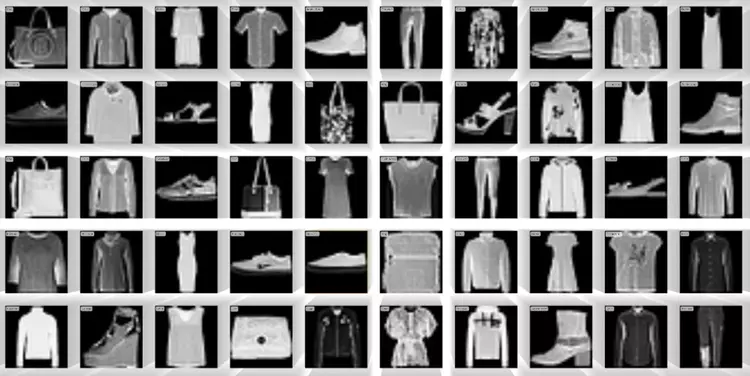

In [15]:
def show_item(item_idx = 254):
  plt.figure()
  plt.imshow(train_images[item_idx], cmap='gray')
  plt.colorbar()
  plt.grid(False)
  plt.show()

  for i, name in enumerate(class_names):
      if i == train_labels[item_idx]:
          print(f"Correct: {name}")
      else:
          print(f"\t{name}")

  data_idx = 0  # Replace with the index of the image you want to print
  image = train_images[item_idx]

  for row in image:
      for pixel in row:
          print(f"{pixel:3d}", end=" ")  # Print each pixel value with fixed width
      print()  # Move to the next line after each row


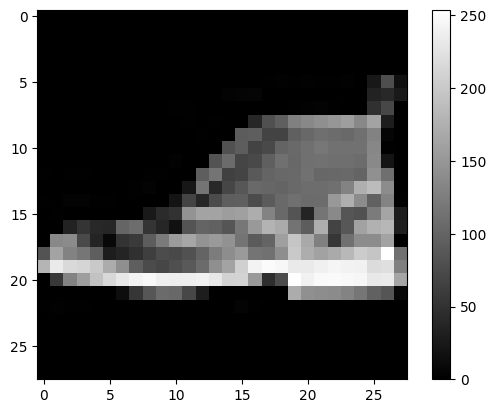

	T-shirt/top
	Trouser
	Pullover
	Dress
	Coat
	Sandal
	Shirt
	Sneaker
	Bag
Correct: Ankle boot
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   2   1   2   1   1   2   0  24  78  16 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   3   4   5   0   0   0   0   0   0   0   0  34  40  25 
  0   0   0   0   0   0   0   0   0   0   1   1   0   0   0   0   0   0   0   1   2   3   1   0   0  48  71   0 
  

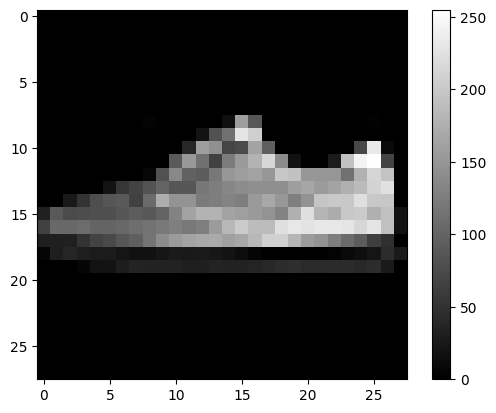

	T-shirt/top
	Trouser
	Pullover
	Dress
	Coat
	Sandal
	Shirt
Correct: Sneaker
	Bag
	Ankle boot
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  

In [16]:
show_item(item_idx = 254)
show_item(item_idx = 345)


First, we will apply Flatten to convert the grid of pixel values to a vector.
(https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)
Flatten works as if each pixel is simply an answer to a question of a survey that we want to use all the answers to infer something about the subject that takes the questionaire. So we end up losing the locations of the pixels (we lose the spatial information - we lose the fact that these pixels come from a grid-like arrangement). Later on, we will learn convolutional neural nets to deal with this problem.

Then, we will set up ten neurons, one for each class (class-0 to class-9) and each one calculating a weighted sum of its 784 inputs so that it gives us the log-odds of that class with respect to class-0. After the training, whichever neuron gives us the highest output, we classify the input to be of that class. The softmax helps for learning these weights.
(https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)


In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(number_of_classes)
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


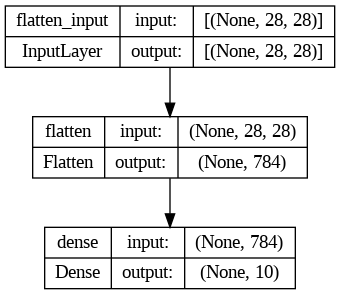

In [5]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [6]:
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes=number_of_classes)
val_labels_one_hot = tf.keras.utils.to_categorical(val_labels, num_classes=number_of_classes)
test_labels_one_hot = tf.keras.utils.to_categorical(test_labels, num_classes=number_of_classes)


In [7]:
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0


In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
history = model.fit(
    train_images,
    train_labels_one_hot,
    epochs=5,
    verbose=True,
    validation_data=(val_images, val_labels_one_hot)
)

Epoch 1/5
1500/1500 [==============================] - 13s 7ms/step - loss: 0.6242 - accuracy: 0.7906 - val_loss: 0.5053 - val_accuracy: 0.8298
Epoch 2/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4719 - accuracy: 0.8397 - val_loss: 0.4615 - val_accuracy: 0.8410
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4428 - accuracy: 0.8485 - val_loss: 0.4383 - val_accuracy: 0.8490
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4260 - accuracy: 0.8537 - val_loss: 0.4335 - val_accuracy: 0.8490
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4172 - accuracy: 0.8559 - val_loss: 0.4288 - val_accuracy: 0.8507


In [10]:
# Train the model using the full training dataset (train + validation)

full_train_images = np.concatenate((train_images, val_images))
full_train_labels_one_hot = np.concatenate((train_labels_one_hot, val_labels_one_hot))

history = model.fit(
    full_train_images,
    full_train_labels_one_hot,
    epochs=5,
    verbose=True
    # Note: We are not using a validation set here since we are training on the full dataset
)


Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4123 - accuracy: 0.8569
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4076 - accuracy: 0.8585
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4012 - accuracy: 0.8597
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3980 - accuracy: 0.8619
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3952 - accuracy: 0.8626


In [11]:
model.predict(train_images[0:10])

1/1 [==============================] - 0s 61ms/step


array([[-9.6065035e+00, -1.4276579e+01, -5.8318906e+00, -6.7608414e+00,
        -1.0382493e+01,  5.0317421e+00, -5.5783916e+00,  1.1112847e+01,
         1.7443111e+00,  1.1187382e+00],
       [-6.0120881e-01,  4.3267188e+00, -4.9850428e-01,  2.6922681e+00,
         9.4876409e-02, -8.1634903e+00, -1.7198215e+00, -1.4413120e+01,
        -6.8229818e-01, -6.7094922e+00],
       [-4.4312072e+00, -7.7165723e+00, -1.7975774e+00, -3.4089611e+00,
        -4.4532981e+00,  7.3586636e+00, -2.3580489e+00,  1.2715806e+00,
         8.8444775e-01, -1.4893259e+00],
       [-2.3802061e+00, -8.2244110e+00,  4.4167943e-02, -4.6433172e+00,
         1.7406332e-01, -3.3240554e+00, -2.0897776e-01, -2.0834410e+01,
         4.9114265e+00, -2.0192156e+01],
       [-4.2413583e+00, -5.7090545e+00,  2.0851688e+00, -4.5064282e+00,
        -1.0143322e+00, -1.5048860e+01,  3.1519675e-01, -3.6642567e+01,
        -5.5780797e+00, -2.1077667e+01],
       [-8.1214361e+00, -1.3214746e+01, -7.1144428e+00, -7.0392952e+00,
   

In [12]:
loss, accuracy = model.evaluate(test_images, test_labels_one_hot)
print(f"Test accuracy: {accuracy*100:.2f}%")

#it will do it in mini-batches

313/313 [==============================] - 1s 3ms/step - loss: 0.4471 - accuracy: 0.8435
Test accuracy: 84.35%
